In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [221]:
# read the CSV into a DataFrame
df_decay = pd.read_csv('hyperparams/decay.csv')

# quick preview
df_decay.head()
df_decay = df_decay.sort_values('decay', ascending=True)
df_decay

df_decay.set_index(df_decay.columns[0], inplace=True)
df_decay = df_decay.reset_index().rename(columns={"index": "decay"})

df_H = pd.read_csv('hyperparams/H.csv')
df_H = df_H.sort_values('H', ascending=True)
df_H.set_index(df_H.columns[0], inplace=True)
df_H = df_H.reset_index().rename(columns={"index": "H"})
df_H

df_window = pd.read_csv('hyperparams/window.csv')
df_window = df_window.sort_values('WINDOW', ascending=True)
df_window.set_index(df_window.columns[0], inplace=True)
df_window = df_window.reset_index().rename(columns={"index": "window"})
df_window


,WINDOW,ICEWS14,WIKIOLD,YAGO,smallpedia,ICEWS18,GDELT,polecat
0,2,0.413646,0.814355,0.905048,0.610686,0.310660,0.217316,0.233708
1,3,0.418784,0.826066,0.912195,0.643877,0.306386,0.217778,0.232334
2,5,0.436901,0.825396,0.905137,0.643659,0.320520,0.222391,0.243455
3,10,0.443604,0.812785,0.908258,0.632010,0.327096,0.229588,0.249509
4,30,0.448778,0.809234,0.908682,0.628645,0.328536,0.236009,0.254030
5,50,0.449717,0.810019,0.908788,0.625614,0.328107,0.237848,0.254937
6,100,0.448074,0.806073,NaN,NaN,0.327951,0.238681,0.255439
7,150,0.447992,NaN,NaN,NaN,NaN,0.238264,0.255718
8,200,NaN,NaN,NaN,NaN,NaN,0.237977,0.255628


In [222]:
df_H

,H,ICEWS14,WIKIOLD,YAGO,smallpedia,ICEWS18,GDELT,polecat
0,1,0.430408,0.827594,0.909120,0.644272,0.313723,0.220638,0.241696
1,5,0.448665,0.826783,0.908579,0.643612,0.327885,0.237338,0.254427
2,10,0.449771,0.826286,0.908604,0.644170,0.328127,0.237976,0.255719
3,50,0.449469,0.825577,0.908612,0.643800,0.327948,0.238073,0.256029


In [223]:

# group1 = ['ICEWS14', 'ICEWS18', 'GDELT', 'polecat','smallpedia']
# group2 = ['WIKIOLD', 'YAGO']

In [224]:
# df

In [225]:
# dfs    = [df_H, df_decay, df_window]
# x_cols = ["H", "decay", "WINDOW"]
# titles = ["H", "Decay", "Window"]

# plot_grid(dfs, x_cols, titles)

In [226]:
N=5
colors = cm.get_cmap("viridis", N)
color_list = [colors(i) for i in range(N)]
color = color_list[0]   # number in [0, 1]


def compute_global_ylim(dfs, x_cols):
    """
    Compute per-dataset y-limits shared across all hyperparameters.
    """
    datasets = [c for c in dfs[0].columns if c not in x_cols]
    ylimits = {}

    for d in datasets:
        vals = []
        for df in dfs:
            if d in df.columns:
                vals.extend(df[d].values)

        ymin = min(vals)
        ymax = max(vals)
        margin = (ymax - ymin) * 0.20 if ymax > ymin else 0.01
        ylimits[d] = (ymin - margin, ymax + margin)

    return ylimits


def plot_grid(dfs, x_cols, titles):
    """
    dfs    = [df_H, df_decay, df_window]
    x_cols = ["H", "decay", "window"]
    titles = ["H", "Decay", "Window"]
    """
    datasets = [c for c in dfs[0].columns if c not in x_cols]
    datasets = ['WIKIOLD', 'smallpedia', 'YAGO', 'ICEWS14',  'ICEWS18','GDELT',  'polecat']
    n_rows = len(datasets)
    n_cols = len(dfs)

    # Compute shared y-limits per dataset
    global_ylim = compute_global_ylim(dfs, x_cols)

    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(4 * n_cols, 2.2 * n_rows),
        sharex=False,
        sharey=False
    )

    axes = axes.reshape(n_rows, n_cols)

    # Precompute x-ticks per hyperparameter (shared for all datasets)
    xticks_per_col = []
    for df, x in zip(dfs, x_cols):
        xticks_per_col.append(df[x].values)

    for row, dataset in enumerate(datasets):
        for col, (df, x) in enumerate(zip(dfs, x_cols)):
            ax = axes[row, col]

            # Plot curve
            ax.plot(df[x], df[dataset], marker='o', linewidth=0.5, color = color)
            ax.set_ylim(global_ylim[dataset])
            ax.grid(True, alpha=0.3)

            # Column titles
            if row == 0:
                ax.set_title(titles[col], fontsize=12)

            # Row label
            if col == 0:
                ylabel_name = dataset
                if dataset =='WIKIOLD':
                    ylabel_name = 'WIKI'
                ax.set_ylabel(ylabel_name, fontsize=10)

            # LOG SCALE ONLY FOR WINDOW
            if x.lower() == "window":
                ax.set_xscale("log")
                ax.set_xticks(df[x].values)
                ax.get_xaxis().set_major_formatter(
                    plt.FuncFormatter(lambda val, pos: f"{int(val)}")
                )
                # plt.xticks(fontsize=14, rotation=90)
            else:
                ax.set_xticks(df[x].values)
            ax.tick_params(axis='x', labelsize=10, rotation=90)
            # Only bottom row shows tick labels
            if row < n_rows - 1:
                ax.tick_params(axis='x', which='both', labelbottom=False)
            # else:
            #     ax.set_xlabel(titles[col], fontsize=10)

    plt.tight_layout()
    plt.savefig("hyperparam_analysis.png", dpi=300)
    plt.savefig("hyperparam_analysis.pdf")
    plt.show()


C:\Users\jgasting\AppData\Local\Temp\ipykernel_18920\3980577926.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis", N)


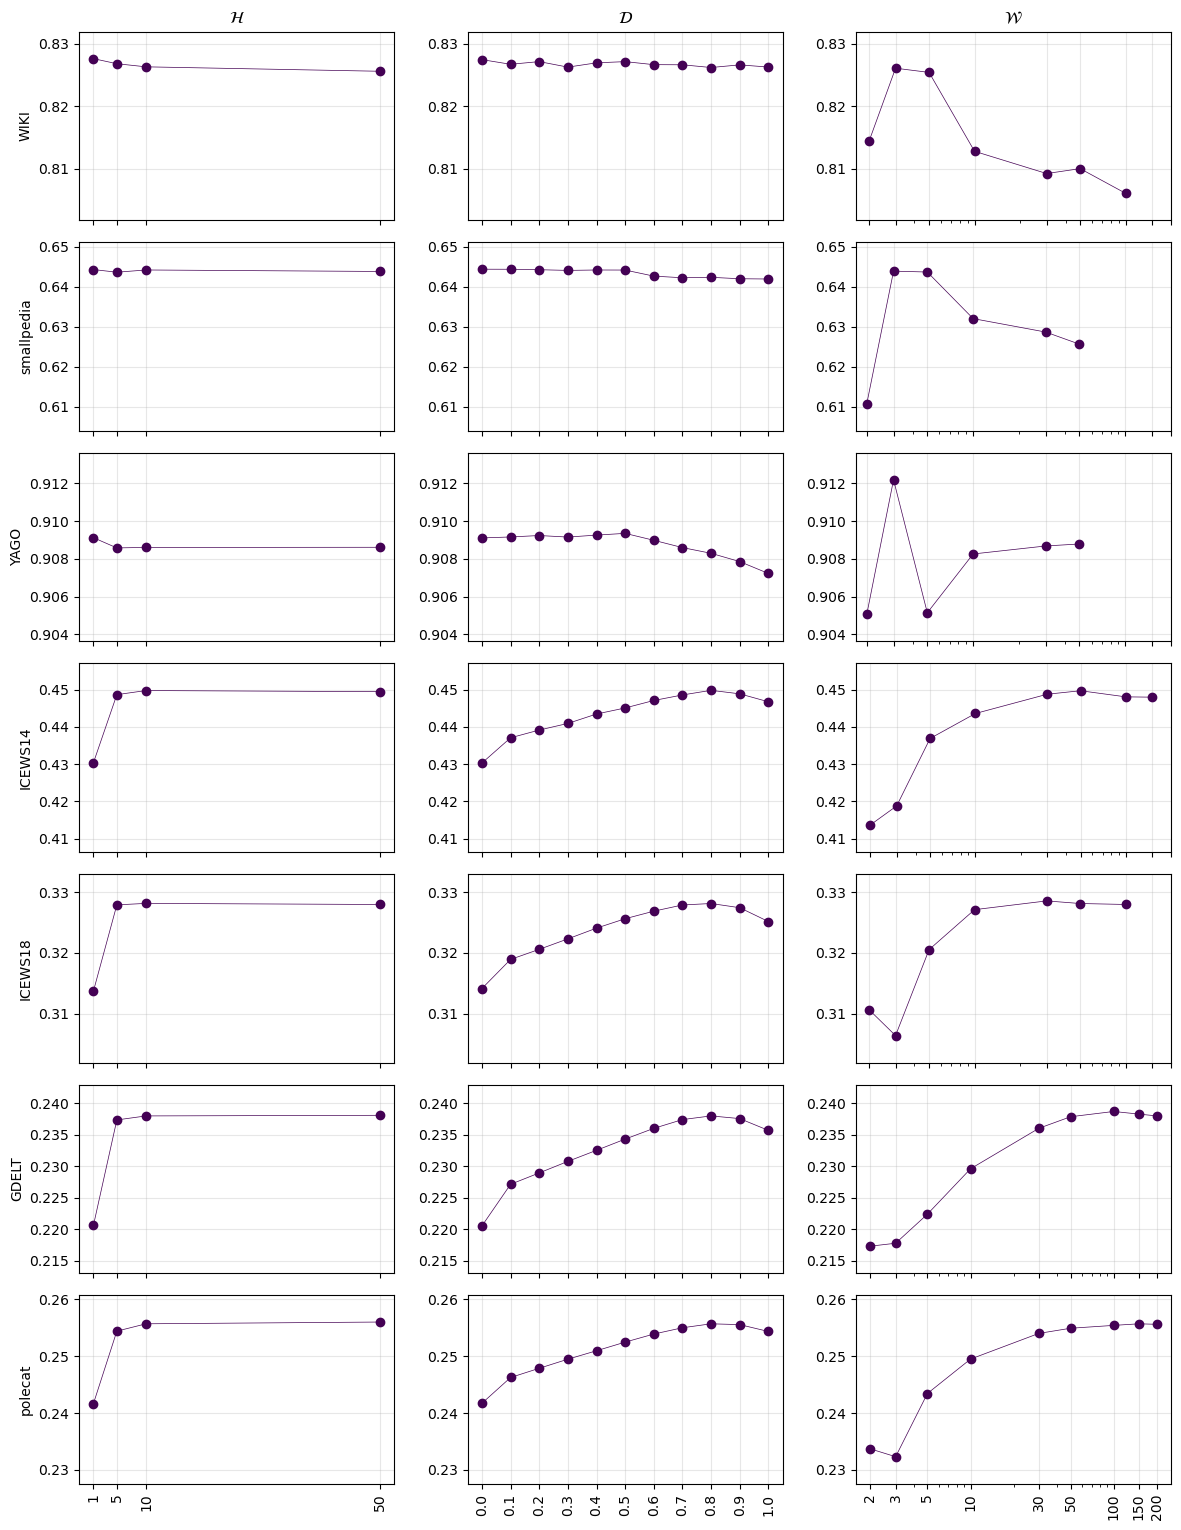

In [227]:
dfs    = [df_H, df_decay, df_window]
x_cols = ["H", "decay", "WINDOW"]
titles = ["$\mathcal{H}$", "$\mathcal{D}$", "$\mathcal{W}$"]

plot_grid(dfs, x_cols, titles)


In [228]:
def compute_global_ylim(dfs, x_cols):
    """
    dfs: list of dataframes [df_H, df_decay, df_window]
    x_cols: list of x-column names ["H", "decay", "window"]
    Returns: dict dataset_name -> (ymin, ymax)
    """
    datasets = [c for c in dfs[0].columns if c not in x_cols]
    ylimits = {}

    for d in datasets:
        vals = []
        for df in dfs:
            if d in df.columns:
                vals.extend(df[d].values)

        ymin = min(vals)
        ymax = max(vals)
        margin = (ymax - ymin) * 0.20 if ymax > ymin else 0.01
        ylimits[d] = (ymin - margin, ymax + margin)

    return ylimits


def plot_per_dataset(df, x_col, global_ylim, title=None):
    datasets = [c for c in df.columns if c != x_col]
    n = len(datasets)

    fig, axes = plt.subplots(
        nrows=n,
        ncols=1,
        figsize=(6, 2.2 * n),
        sharex=True
    )

    if n == 1:
        axes = [axes]

    for ax, d in zip(axes, datasets):
        ax.plot(df[x_col], df[d], marker='o', linewidth=2)
        ax.set_title(d)

        # ✔ Use global consistent y-limits for this dataset
        ax.set_ylim(global_ylim[d])

        ax.grid(True, alpha=0.3)

    axes[-1].set_xlabel(x_col, fontsize=12)

    if title:
        fig.suptitle(title, fontsize=14, y=1.02)

    plt.tight_layout()
    plt.show()


In [229]:
import matplotlib.pyplot as plt

def compute_global_ylim(dfs, x_cols):
    """
    Compute per-dataset y-limits shared across all hyperparameters.
    """
    datasets = [c for c in dfs[0].columns if c not in x_cols]
    ylimits = {}

    for d in datasets:
        vals = []
        for df in dfs:
            if d in df.columns:
                vals.extend(df[d].values)

        ymin = min(vals)
        ymax = max(vals)
        margin = (ymax - ymin) * 0.20 if ymax > ymin else 0.01
        ylimits[d] = (ymin - margin, ymax + margin)

    return ylimits


def plot_grid(dfs, x_cols, titles):
    """
    dfs    = [df_H, df_decay, df_window]
    x_cols = ["H", "decay", "window"]
    titles = ["H", "Decay", "Window"]
    """
    datasets = [c for c in dfs[0].columns if c not in x_cols]
    n_datasets = len(datasets)
    n_cols = len(dfs)

    # Compute shared y-limits per dataset
    global_ylim = compute_global_ylim(dfs, x_cols)

    fig, axes = plt.subplots(
        nrows=n_datasets,
        ncols=n_cols,
        figsize=(4 * n_cols, 2.2 * n_datasets),
        sharex=False,
        sharey=False
    )

    # Ensure axes is a 2D array even if n_datasets=1
    axes = axes.reshape(n_datasets, n_cols)

    for row, dataset in enumerate(datasets):
        for col, (df, x) in enumerate(zip(dfs, x_cols)):
            ax = axes[row][col]
            
            # Plot line
            ax.plot(df[x], df[dataset], marker='o', linewidth=2)
            ax.set_ylim(global_ylim[dataset])
            ax.grid(True, alpha=0.3)

            # Labels
            if row == 0:
                ax.set_title(titles[col], fontsize=12)
            if col == 0:
                ax.set_ylabel(dataset, fontsize=10)

            if row == n_datasets - 1:
                ax.set_xlabel(x, fontsize=10)

    plt.tight_layout()
    plt.show()


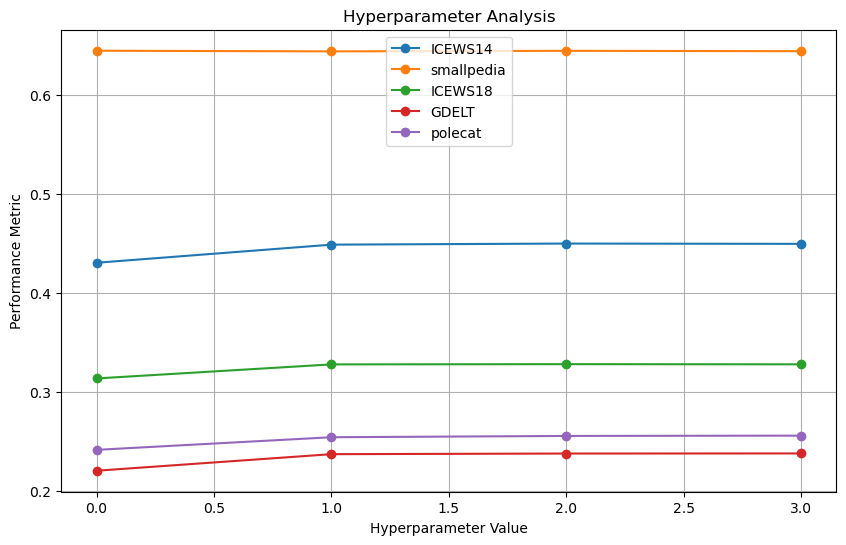

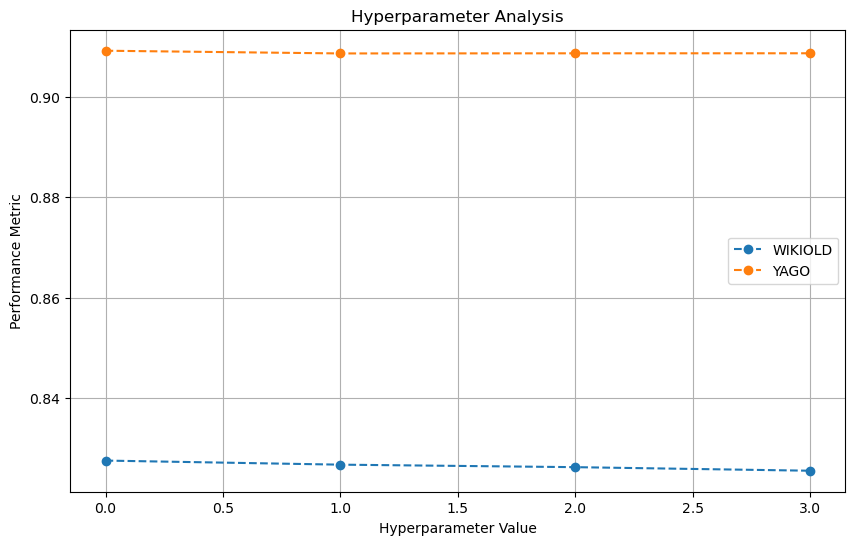

In [230]:
plt.figure(figsize=(10, 6))

for column in df_H.columns:
    if column != 'H':
        if column in group1:
            plt.plot(df_H.index, df_H[column], marker='o', label=column, linestyle='-')

plt.title('Hyperparameter Analysis')
plt.xlabel('Hyperparameter Value')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for column in df_H.columns:
    if column != 'H':
        if column in group2:
            plt.plot(df_H.index, df_H[column], marker='o', label=column, linestyle='--')

plt.title('Hyperparameter Analysis')
plt.xlabel('Hyperparameter Value')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()

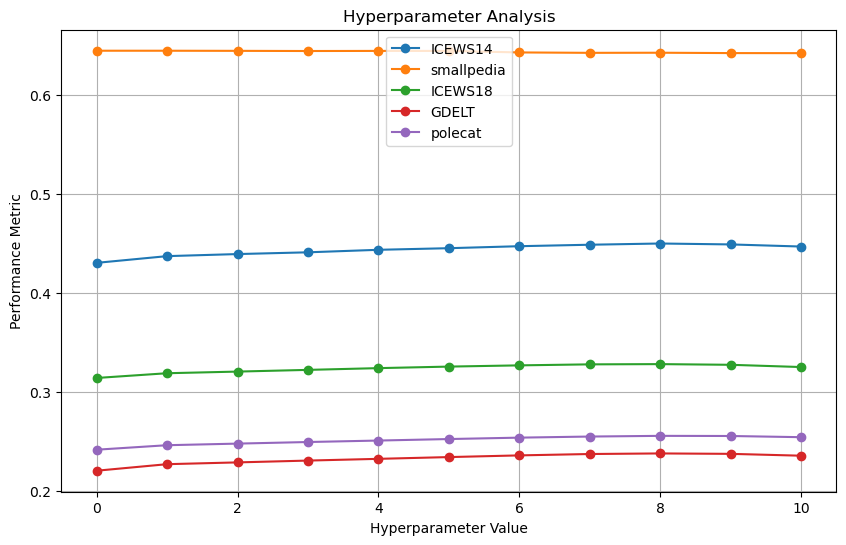

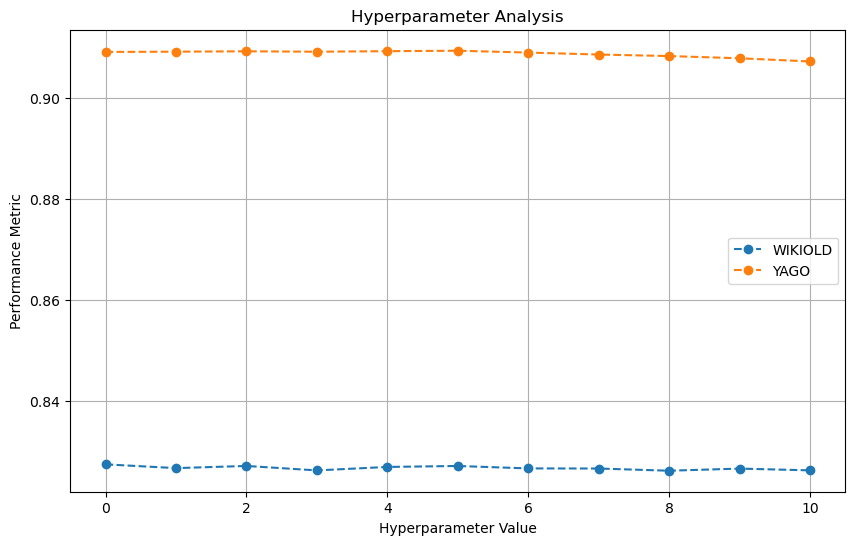

In [231]:
plt.figure(figsize=(10, 6))

for column in df_decay.columns:
    if column != 'decay':
        if column in group1:
            plt.plot(df_decay.index, df_decay[column], marker='o', label=column, linestyle='-')

plt.title('Hyperparameter Analysis')
plt.xlabel('Hyperparameter Value')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for column in df_decay.columns:
    if column != 'decay':
        if column in group2:
            plt.plot(df_decay.index, df_decay[column], marker='o', label=column, linestyle='--')

plt.title('Hyperparameter Analysis')
plt.xlabel('Hyperparameter Value')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()

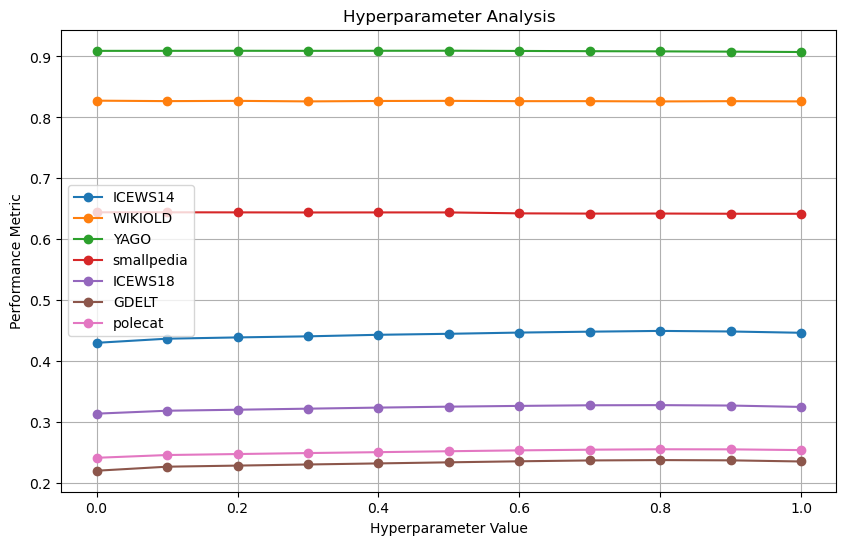

In [232]:
for df_decay in [df_decay]:
    # set the index to the first column (hyperparameter values)
    df_decay.set_index(df_decay.columns[0], inplace=True)

    # plot the data
    plt.figure(figsize=(10, 6))
    for column in df_decay.columns:
        plt.plot(df_decay.index, df_decay[column], marker='o', label=column)

    plt.title('Hyperparameter Analysis')
    plt.xlabel('Hyperparameter Value')
    plt.ylabel('Performance Metric')
    plt.legend()
    plt.grid(True)
    plt.show()